# **Парсинг данных из раздела технологий на lifehacker.ru**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm

## **Формат ссылки для пагинации**

Ссылка на раздел:
https://lifehacker.ru/topics/technology/.

Пагинация:
https://lifehacker.ru/topics/technology/?page={n}, где {n} - номер страницы.

## **Уникальные классы/идентификаторы блока с названием и содержанием материала**

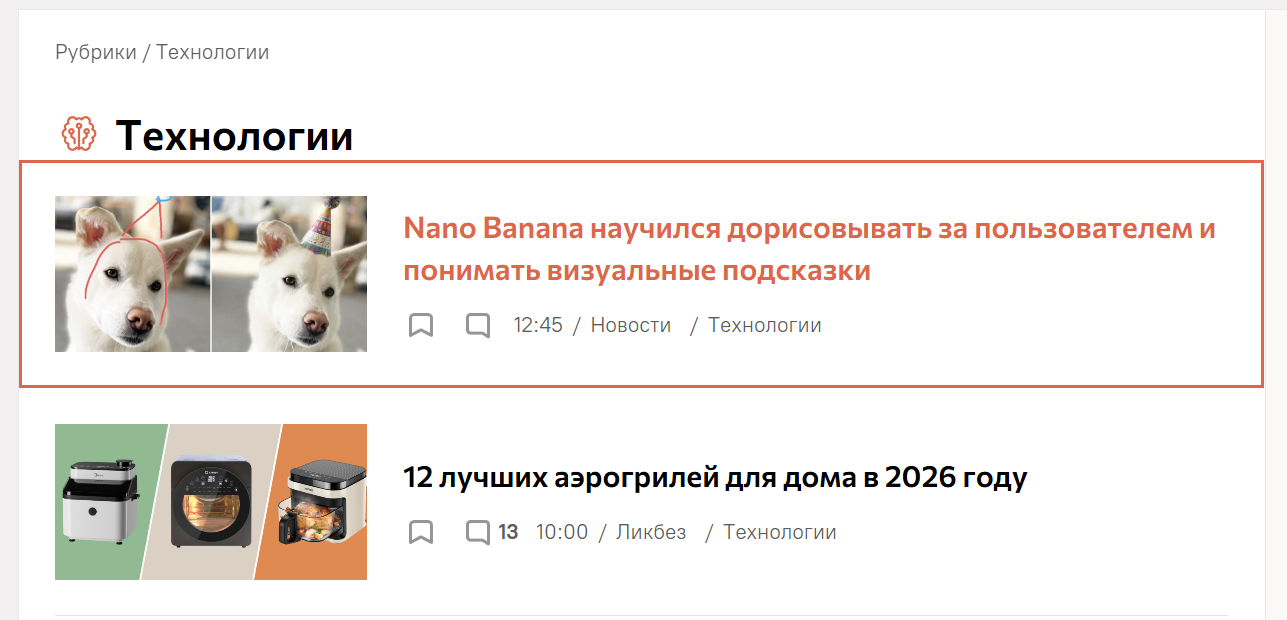

In [ ]:
response = requests.get('https://lifehacker.ru/topics/technology/?page=1')
response.text

In [ ]:
response = requests.get('https://lifehacker.ru/nano-banana-nauchilsya-dorisovyvat/')
response.text

Название материала и ссылка на материал:

*   class="lh-small-article-card__link"

Он содержит теги href и title

## **Содержимое десяти страниц списка материалов, ссылки на каждый материал**

In [4]:
base_url = 'https://lifehacker.ru/topics/technology/'
response = requests.get('https://lifehacker.ru/topics/technology/?page=1')
soup = BeautifulSoup(response.text, 'lxml')

In [5]:
soup.find_all('a', class_='lh-small-article-card__link')

[<a aria-label="Минцифры четвёртый раз обновило «белый список» — одно из крупнейших расширений" class="lh-small-article-card__link" data-jest="link" href="/supermarkety-v-belom-spiske/" title="Минцифры четвёртый раз обновило «белый список» — одно из крупнейших расширений"><!--[--><!--]--></a>,
 <a aria-label="Nano Banana научился дорисовывать за пользователем и понимать визуальные подсказки" class="lh-small-article-card__link" data-jest="link" href="/nano-banana-nauchilsya-dorisovyvat/" title="Nano Banana научился дорисовывать за пользователем и понимать визуальные подсказки"><!--[--><!--]--></a>,
 <a aria-label="12 лучших аэрогрилей для дома в 2026&amp;nbsp;году" class="lh-small-article-card__link" data-jest="link" href="/10-luchshix-aerogrilej-dlya-doma-v-2025-godu/" title="12 лучших аэрогрилей для дома в 2026&amp;nbsp;году"><!--[--><!--]--></a>,
 <a aria-label="Для всего и сразу: 8 агрегаторов нейросетей с едиными лимитами на все задачи" class="lh-small-article-card__link" data-jest

In [6]:
for link_tag in soup.find_all('a', class_='lh-small-article-card__link'):
  print (link_tag.get('title'))

Минцифры четвёртый раз обновило «белый список» — одно из крупнейших расширений
Nano Banana научился дорисовывать за пользователем и понимать визуальные подсказки
12 лучших аэрогрилей для дома в 2026&nbsp;году
Для всего и сразу: 8 агрегаторов нейросетей с едиными лимитами на все задачи
«Яндекс» раскрыл подробности о своих беспроводных наушниках «Дропс» с «Алисой AI»
iPhone 18 Pro может получить фронтальную камеру в углу экрана вместо Dynamic Island
В ChatGPT появился магазин приложений с доступом к Apple Music, Photoshop и другим интеграциям
В России создадут единую базу IMEI мобильных устройств — их привяжут к номерам
Уже не круто и просто опасно: как нейроконтент заполонил Сеть и что с этим делать
РКН может разблокировать Roblox — компания готова выполнить требования
У вас Android и вы выбираете iPhone? Вот 12 вещей, о которых стоит знать заранее
Добро пожаловать в научную фантастику! Как технологии меняют современные компании и жизнь их клиентов
OpenAI представила&nbsp;флагманский ге

In [7]:
from urllib.parse import urljoin
base_url = 'https://lifehacker.ru'

title_link_material = [[], [], []]

for i in range (1, 11):
  response = requests.get(f'https://lifehacker.ru/topics/technology/?page={i}')
  soup = BeautifulSoup(response.text, 'lxml')
  for elem in soup.find_all('a', class_='lh-small-article-card__link'):
    title_link_material[0].append(elem.get('title'))
    title_link_material[1].append(urljoin(base_url, elem.get('href')))

pd.DataFrame(title_link_material[1], title_link_material[0])

,0
Минцифры четвёртый раз обновило «белый список» — одно из крупнейших расширений,https://lifehacker.ru/supermarkety-v-belom-spi...
Nano Banana научился дорисовывать за пользователем и понимать визуальные подсказки,https://lifehacker.ru/nano-banana-nauchilsya-d...
12 лучших аэрогрилей для дома в 2026&nbsp;году,https://lifehacker.ru/10-luchshix-aerogrilej-d...
Для всего и сразу: 8 агрегаторов нейросетей с едиными лимитами на все задачи,https://lifehacker.ru/agregatory-nejrosetej/
«Яндекс» раскрыл подробности о своих беспроводных наушниках «Дропс» с «Алисой AI»,https://lifehacker.ru/anons-naushnikov-yandeks...
...,...
BMW представила свой первый электросапборд — с автоматическим надувом,https://lifehacker.ru/bmw-predstavila-elektros...
"В Telegram теперь можно покупать акции Tesla, Apple и других компаний — даже россиянам",https://lifehacker.ru/v-telegram-teper-mozhno-...
"13 приложений, которые помогут бороться с прокрастинацией",https://lifehacker.ru/prilozheniya-protiv-prok...
ИИ-модели могут развивать своё «стремление к выживанию» — как в «2001 год: Космическая одиссея»,https://lifehacker.ru/instinkt-samosoxraneniya...


## **Перебор всех полученных ссылок и парсинг**

### **Пробую на одной статье**

In [8]:
response = requests.get(title_link_material[1][1])
soup = BeautifulSoup(response.text, 'lxml')
soup.find_all('p', style="")

[<p data-v-0c082007="" style="">В ИИ-сервисе Gemini <span class="context-menu" data-v-55078ddb="" data-v-fdc61108=""><span class="context-menu__handler ref" data-v-fdc61108=""><!--[--><!--[-->появился<!--]--><!--]--></span><!--teleport start--><!--teleport end--><!--teleport start--><!--teleport end--></span> новый способ работы с моделью <a href="https://lifehacker.ru/nano-banana/" rel="noreferrer noopener" style="" target="_blank" title="Как пользоваться нейросетью Nano Banana — «убийцей фотошопа» от Google">Nano Banana</a> — теперь можно редактировать изображения, рисуя и оставляя подсказки прямо на них. Вместо длинных текстовых инструкций достаточно просто отметить нужные области на картинке.</p>,
 <p data-v-0c082007="" style="">После добавления изображения в поле запроса его можно открыть в специальном редакторе. Инструмент Sketch позволяет рисовать, выделять и указывать на конкретные элементы изображения, а в правом верхнем углу доступны кнопки отмены действий. С помощью инструме

In [9]:
soup.find_all('p', style="")[0].get_text()

'В ИИ-сервисе Gemini появился новый способ работы с моделью Nano Banana — теперь можно редактировать изображения, рисуя и оставляя подсказки прямо на них. Вместо длинных текстовых инструкций достаточно просто отметить нужные области на картинке.'

In [10]:
full_article = ''
for part in soup.find_all('p', style=""):
  full_article = (full_article + ' ' + part.get_text())

In [11]:
full_article

' В ИИ-сервисе Gemini появился новый способ работы с моделью Nano Banana — теперь можно редактировать изображения, рисуя и оставляя подсказки прямо на них. Вместо длинных текстовых инструкций достаточно просто отметить нужные области на картинке. После добавления изображения в поле запроса его можно открыть в специальном редакторе. Инструмент Sketch позволяет рисовать, выделять и указывать на конкретные элементы изображения, а в правом верхнем углу доступны кнопки отмены действий. С помощью инструмента Text можно размещать текстовые подсказки прямо поверх картинки. При загрузке первого изображения сервис отдельно уведомит пользователя о новой возможности. Функция скоро станет доступна всем в Gemini на Android, iOS и в веб‑версии. Параллельно Google расширила возможности SynthID — системы водяных знаков для ИИ‑контента. Теперь она умеет работать не только с изображениями, но и с видео. Пользователь может загрузить ролик размером до 100 МБ и длительностью до 90 секунд и спросить, был ли 

### **Собираю все материалы:**

In [ ]:
for link in tqdm(title_link_material[1]):
  response = requests.get(link)
  soup = BeautifulSoup(response.text, 'lxml')

  full_article = ''
  for part in soup.find_all('p', style=""):
    full_article = (full_article + ' ' + part.get_text())

  title_link_material[2].append(full_article.strip())

 92%|█████████▏| 277/300 [10:36<00:46,  2.03s/it]

## **Датайфрейм с полученными данными**

In [16]:
dictionary = {'Название статьи': title_link_material[0], 'Ссылка': title_link_material[1], 'Текст': title_link_material[2]}

In [17]:
results = pd.DataFrame(dictionary)
results

,Название статьи,Ссылка,Текст
0,Минцифры четвёртый раз обновило «белый список»...,https://lifehacker.ru/supermarkety-v-belom-spi...,Министерство цифрового развития России вновь р...
1,Nano Banana научился дорисовывать за пользоват...,https://lifehacker.ru/nano-banana-nauchilsya-d...,В ИИ-сервисе Gemini появился новый способ рабо...
2,12 лучших аэрогрилей для дома в 2026&nbsp;году,https://lifehacker.ru/10-luchshix-aerogrilej-d...,Одни модели аэрогрилей предлагают большую мощн...
3,Для всего и сразу: 8 агрегаторов нейросетей с ...,https://lifehacker.ru/agregatory-nejrosetej/,С ростом популярности нейросетей появились агр...
4,«Яндекс» раскрыл подробности о своих беспровод...,https://lifehacker.ru/anons-naushnikov-yandeks...,«Яндекс» поделился новыми подробностями о свои...
...,...,...,...
295,BMW представила свой первый электросапборд — с...,https://lifehacker.ru/bmw-predstavila-elektros...,BMW представила свой первый электрический сапб...
296,"В Telegram теперь можно покупать акции Tesla, ...",https://lifehacker.ru/v-telegram-teper-mozhno-...,В Telegram появилась возможность покупать акци...
297,"13 приложений, которые помогут бороться с прок...",https://lifehacker.ru/prilozheniya-protiv-prok...,"Эти сервисы наглядно покажут, сколько и чем вы..."
298,ИИ-модели могут развивать своё «стремление к в...,https://lifehacker.ru/instinkt-samosoxraneniya...,Исследовательская компания Palisade обнаружила...


In [20]:
print(results['Текст'].iloc[0])

Министерство цифрового развития России вновь расширило «белый список» — перечень ресурсов, которые будут оставаться доступными даже при ограничении работы мобильного интернета. Это уже четвёртое обновление за 3,5 месяца и одно из самых крупных. Теперь в него внесли эти сайты и сервисы: Ранее в список были включены «Госуслуги», национальный мессенджер Max, крупные маркетплейсы, сайты банков, государственные СМИ и многое другое. В ведомстве отметили, что и дальше продолжат его обновлять, добавляя самые популярные и востребованные ресурсы, вычислительные мощности которых находятся на территории России. Первый список →Второй список →Третий список →
